###                                                                      Green Destinations

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
data = pd.read_csv("greendestination (1).csv")
# Check the first few rows
print(data.head())
print(data.info())

   Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...

In [8]:
print(data.isnull().sum())
# Drop any rows with missing values
data.dropna(inplace=True)
# Check for duplicates
data.drop_duplicates(inplace=True)

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [9]:
#Calculate the Attrition Rate
# Total employees
total_employees = len(data)
# Employees who left
employees_left = data[data["Attrition"] == "Yes"]
print(f"Total Employees: {total_employees}")
print(f"Employees Who Left: {len(employees_left)}")
# Attrition rate
attrition_rate = (len(employees_left) / total_employees) * 100
print(f"Attrition Rate: {attrition_rate:.2f}%")

Total Employees: 1470
Employees Who Left: 237
Attrition Rate: 16.12%


In [10]:
# Analyze Attrition by MonthlyIncome
# Compare income
income_data = data.groupby("Attrition")["MonthlyIncome"].mean()
print("Average Income by Attrition Status:\n", income_data)

Average Income by Attrition Status:
 Attrition
No     6832.739659
Yes    4787.092827
Name: MonthlyIncome, dtype: float64


In [11]:
#Analyze the Attrition by Years at Company
#Compare years at company
years_stats = data.groupby("Attrition")["YearsAtCompany"].mean()
print("Average Years at Company by Attrition Status:\n", years_stats)

Average Years at Company by Attrition Status:
 Attrition
No     7.369019
Yes    5.130802
Name: YearsAtCompany, dtype: float64


In [12]:
#Analyze the Attrition by Age
#Average age of employees who left vs stayed
age_stats = data.groupby("Attrition")["Age"].mean()
print("Average Age by Attrition Status:\n", age_stats)

Average Age by Attrition Status:
 Attrition
No     37.561233
Yes    33.607595
Name: Age, dtype: float64


In [13]:
#Create a Crosstab (for visual comparison)
# Example: Attrition rate by department (if the column exists)
department_attrition = pd.crosstab(data["Department"], data["Attrition"],
normalize='index') * 100
print("Attrition Rate by Department:\n", department_attrition)

Attrition Rate by Department:
 Attrition                      No        Yes
Department                                  
Human Resources         80.952381  19.047619
Research & Development  86.160250  13.839750
Sales                   79.372197  20.627803


C:\Users\SHAIK NABI RASOOL\AppData\Local\Temp\ipykernel_13544\179575131.py:24: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[0].legend(title="Attrition")
C:\Users\SHAIK NABI RASOOL\AppData\Local\Temp\ipykernel_13544\179575131.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


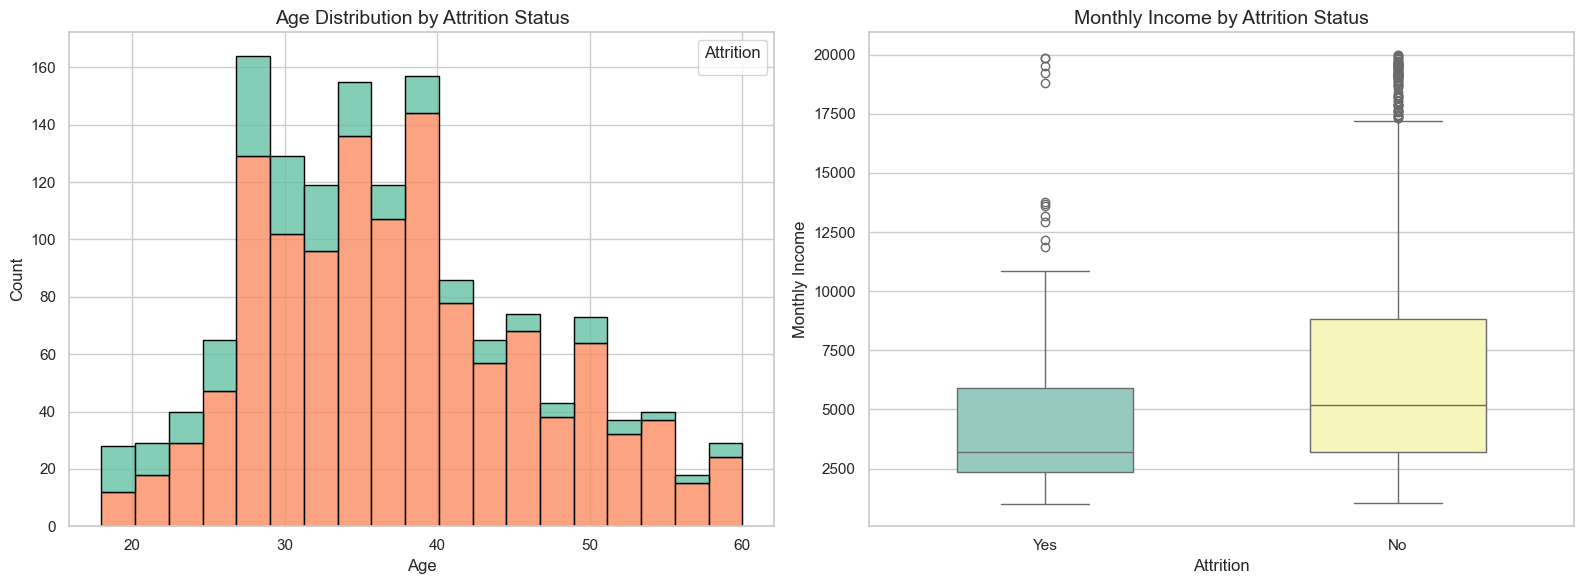

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn style for better visuals
sns.set(style="whitegrid")

# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Histogram of Age by Attrition with enhancements
sns.histplot(
    data=data,
    x="Age",
    hue="Attrition",
    multiple="stack",
    palette="Set2",
    edgecolor="black",
    alpha=0.8,
    ax=axes[0]
)
axes[0].set_title("Age Distribution by Attrition Status", fontsize=14)
axes[0].set_xlabel("Age", fontsize=12)
axes[0].set_ylabel("Count", fontsize=12)
axes[0].legend(title="Attrition")

# Boxplot of MonthlyIncome by Attrition with enhancements
sns.boxplot(
    x="Attrition",
    y="MonthlyIncome",
    data=data,
    palette="Set3",
    width=0.5,
    ax=axes[1]
)
axes[1].set_title("Monthly Income by Attrition Status", fontsize=14)
axes[1].set_xlabel("Attrition", fontsize=12)
axes[1].set_ylabel("Monthly Income", fontsize=12)

# Adjust layout and display the plots
plt.tight_layout()
plt.show()


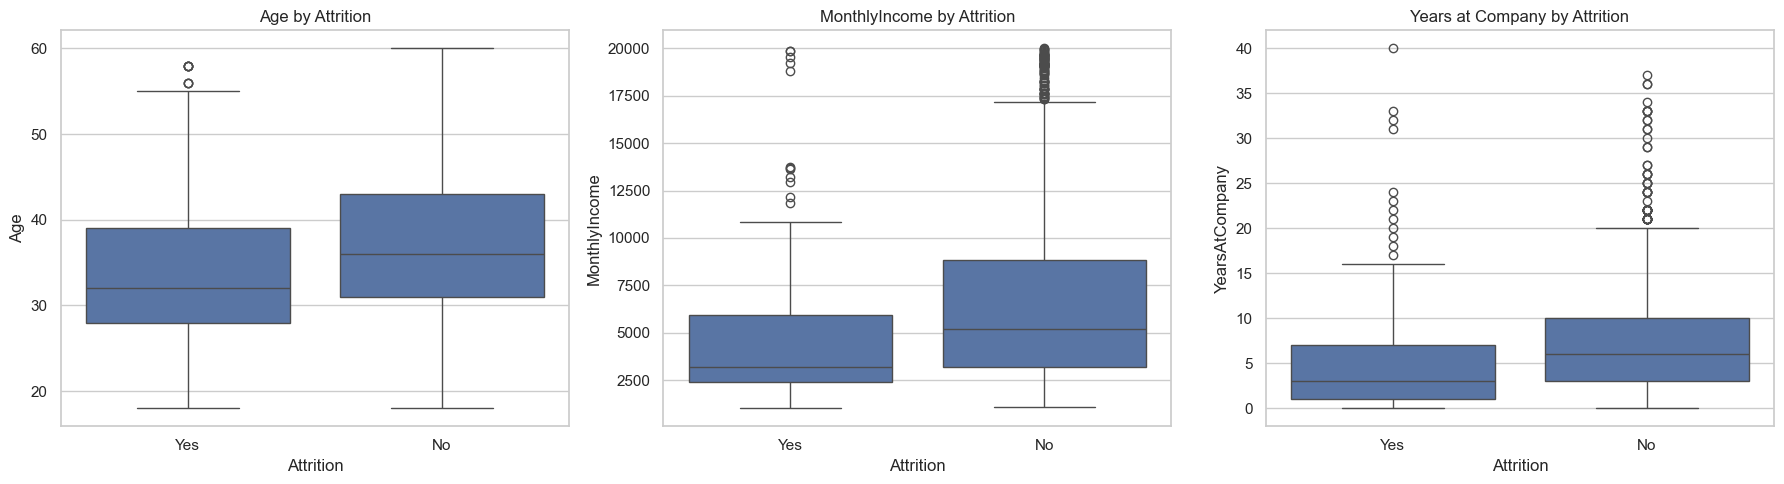

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
# Set Seaborn style
sns.set(style="whitegrid")
# Create side-by-side box plots for key features by Attrition
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
# Boxplot for Age
sns.boxplot(data=data, x='Attrition', y='Age', ax=axes[0])
axes[0].set_title('Age by Attrition')
# Boxplot for Monthly Income
sns.boxplot(data=data, x='Attrition', y='MonthlyIncome', ax=axes[1])
axes[1].set_title('MonthlyIncome by Attrition')
# Boxplot for Years at Company
sns.boxplot(data=data, x='Attrition', y='YearsAtCompany', ax=axes[2])
axes[2].set_title('Years at Company by Attrition')
# Adjust layout and show plot
plt.tight_layout()
plt.show()

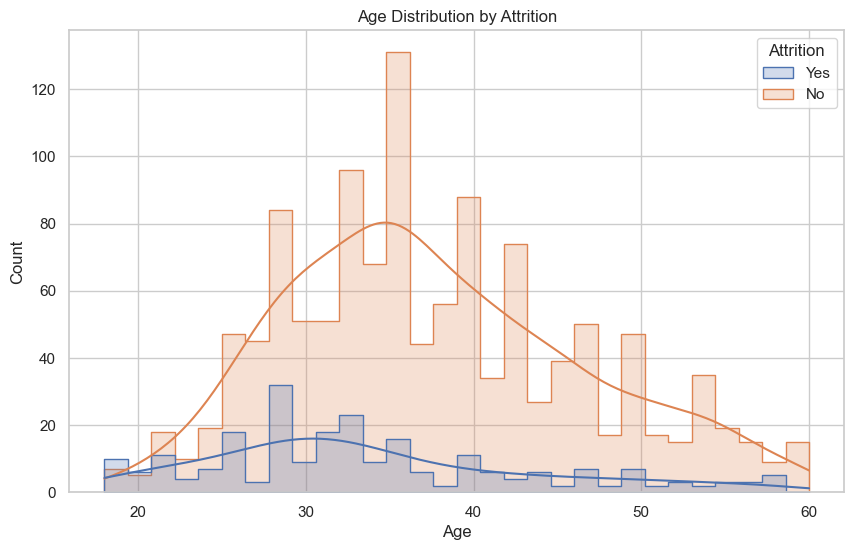

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
# Set plot style
sns.set(style="whitegrid")
# Plot: Age distribution by Attrition
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='Age', hue='Attrition', kde=True, element='step', bins=30)
plt.title('Age Distribution by Attrition')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

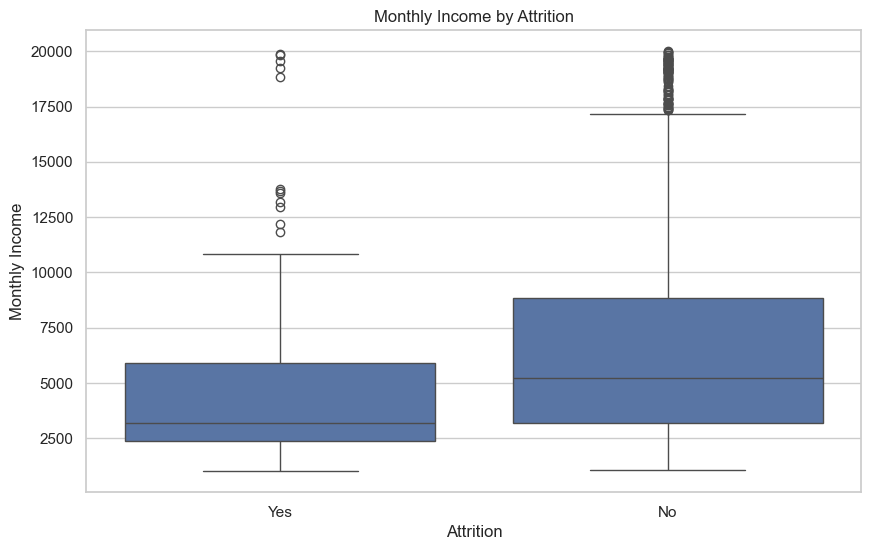

In [19]:
# Plot: Monthly Income vs Attrition
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='Attrition', y='MonthlyIncome')
plt.title('Monthly Income by Attrition')
plt.xlabel('Attrition')
plt.ylabel('Monthly Income')
plt.show()

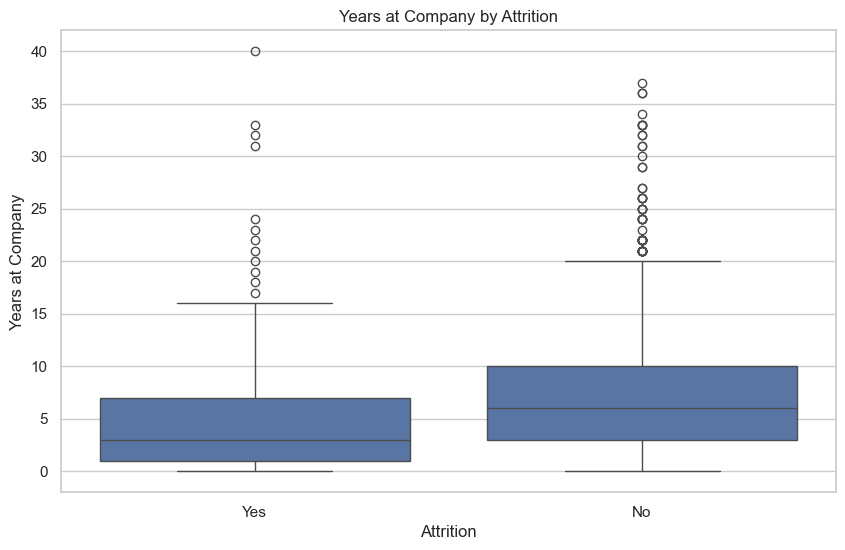

In [20]:
# Plot: Years at Company by Attrition
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='Attrition', y='YearsAtCompany')
plt.title('Years at Company by Attrition')
plt.xlabel('Attrition')
plt.ylabel('Years at Company')
plt.show()

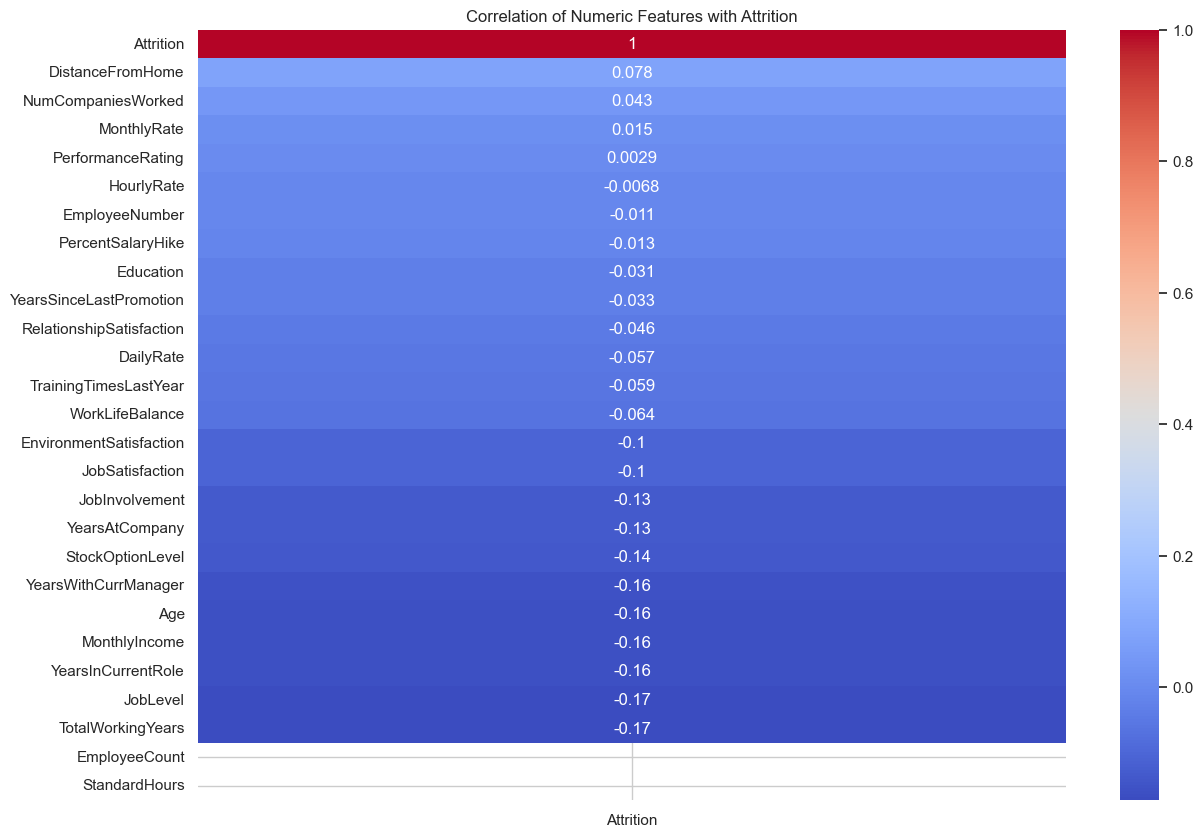

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
# Convert 'Attrition' to numeric (Yes:1, No:0) for correlation
data_corr = data.copy()
data_corr['Attrition'] = data_corr['Attrition'].map({'Yes': 1, 'No': 0})
# Compute correlation matrix
correlation = data_corr.corr(numeric_only=True)
# Plot heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation[['Attrition']].sort_values(by='Attrition', ascending=False),
annot=True, cmap='coolwarm')
plt.title('Correlation of Numeric Features with Attrition')
plt.show()

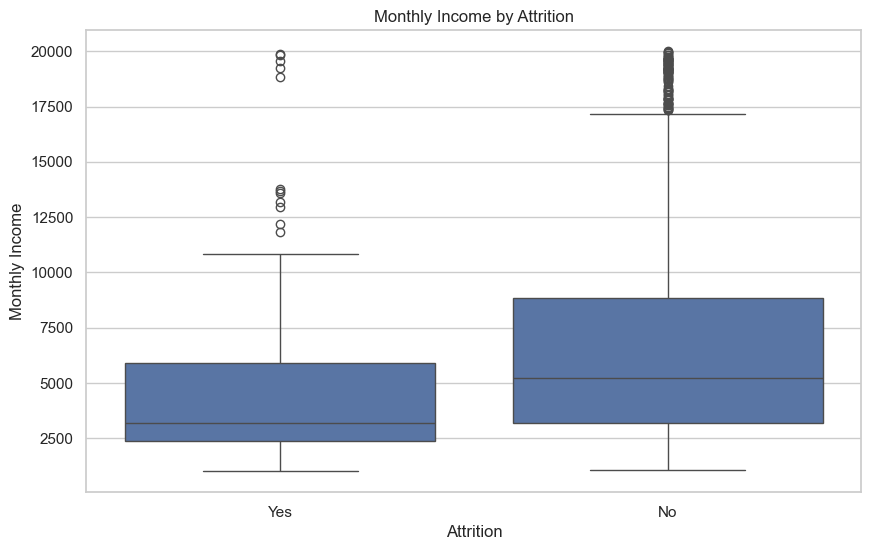

In [22]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Attrition', y='MonthlyIncome', data=data)
plt.title('Monthly Income by Attrition')
plt.xlabel('Attrition')
plt.ylabel('Monthly Income')
plt.show()

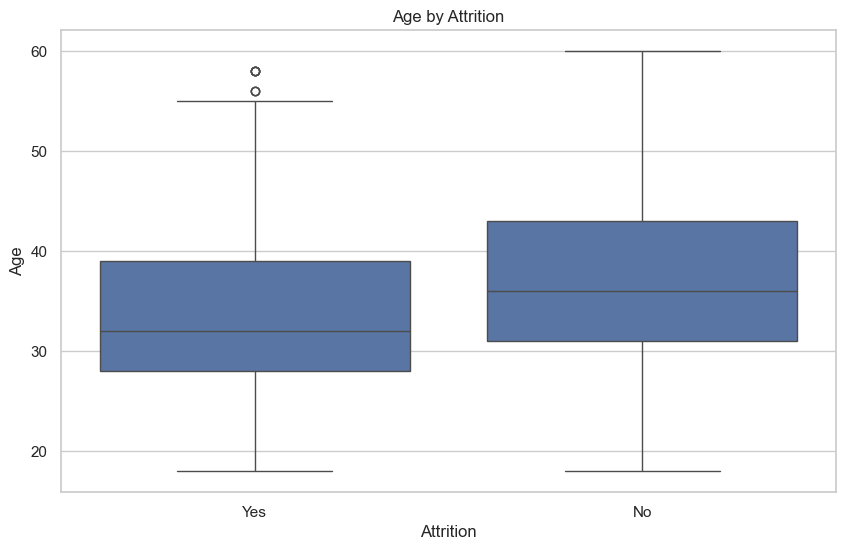

In [23]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Attrition', y='Age', data=data)
plt.title('Age by Attrition')
plt.xlabel('Attrition')
plt.ylabel('Age')
plt.show()

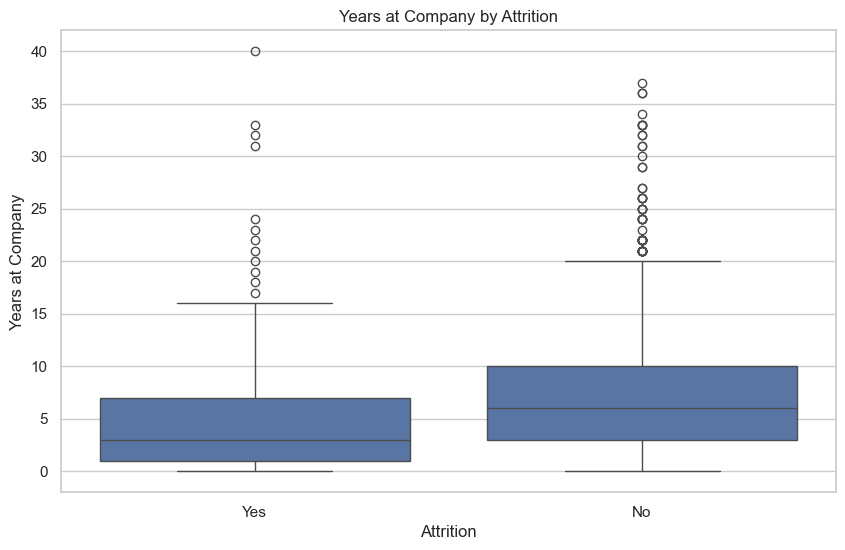

In [24]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Attrition', y='YearsAtCompany', data=data)
plt.title('Years at Company by Attrition')
plt.xlabel('Attrition')
plt.ylabel('Years at Company')
plt.show()

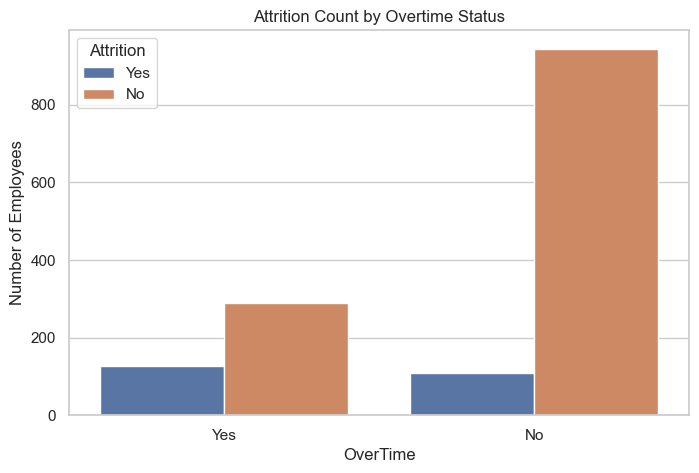

In [25]:
plt.figure(figsize=(8, 5))
sns.countplot(x='OverTime', hue='Attrition', data=data)
plt.title('Attrition Count by Overtime Status')
plt.xlabel('OverTime')
plt.ylabel('Number of Employees')
plt.show()

## Summary

#### 📌 1. Dataset Info
##### Total entries: 194
##### Columns: 8 (including Country, Region, City, Program, Award Year, etc.)
##### No missing values after cleaning.

#### 📊 2. Top Countries by Number of Green Destinations
##### Top 5 countries:
##### Netherlands,Portugal,Slovenia,Spain,Germany
##### Netherlands had the highest number of green destinations listed.

#### 📍 3. Most Common Programs
##### Dominant programs:
##### QualityCoast,Top 100,ITB Award
##### QualityCoast is the most frequently awarded program.

#### 📅 4. Distribution by Award Year
##### Years with the most awards: 2016, 2017, and 2019
##### Shows increasing awareness and recognition over time, especially after 2015.

#### 🌍 5. Regional Distribution
##### Europe leads by a significant margin.
##### Other regions like Asia and Africa have comparatively fewer recognized destinations.

#### 🏙️ 6. Cities with Multiple Green Recognitions
##### Ljubljana (Slovenia) and Cascais (Portugal) appeared multiple times.
These cities consistently engage in green tourism practices.

#### 📈 7. Visual Outputs
##### Bar plots for:
##### Top countries
##### Programs,Award year frequency
##### Pie chart: Proportion of different programs.
##### Count plot: Region-wise destination count.